<a href="https://colab.research.google.com/github/JuanMr7/Dataset/blob/main/DEBER_2_U3_JuanMontesdeoca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

    members  
0  200630.0  
1  793665.0  
2  114262.0  
3  673572.0  
4  151266.0  
           anime_id      episodes        rating       members
count  12125.000000  1.212000e+04  12018.000000  1.201800e+04
mean   137

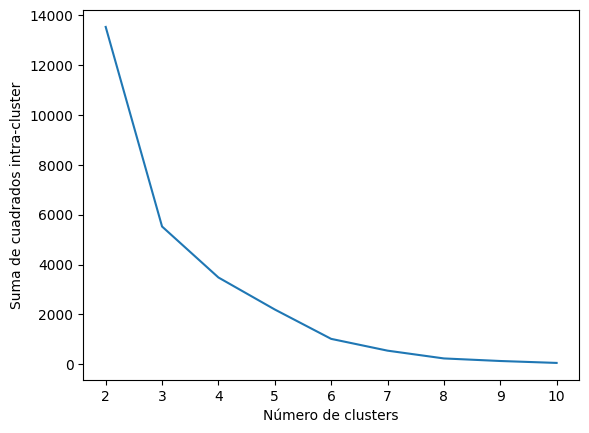

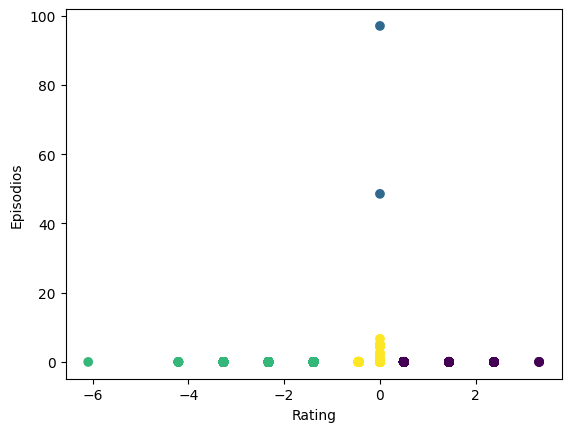

0.7647361004133741


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/JuanMr7/Dataset/main/anime.csv")

# Explorar los datos

# Ver las primeras filas del dataset
print(dataset.head())

# Ver los estadísticos descriptivos de las columnas numéricas
print(dataset.describe())

# Seleccionar las características a utilizar
features = ["rating", "episodes"]

# Identificar los valores no numéricos
print(dataset[features].head())

# Manejar los valores no numéricos
# (convertir decimales a enteros)
dataset[features] = dataset[features].apply(lambda x: np.around(x, 0))

# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[features])

# Imputar los valores NaN
# (usar la media como estrategia)
imputer = SimpleImputer(strategy='mean')
scaled_features = imputer.fit_transform(scaled_features)

# Seleccionar el número de clusters

# Inicializar un arreglo para almacenar las sumas de cuadrados intra-cluster
inertia = []

# Iterar sobre los valores de k desde 2 hasta 10
for k in range(2, 11):

    # Instanciar un modelo KMeans con k clusters
    km = KMeans(n_clusters=k)

    # Entrenar el modelo
    km.fit(scaled_features)

    # Agregar la suma de cuadrados intra-cluster al arreglo
    inertia.append(km.inertia_)

# Visualizar la suma de cuadrados intra-cluster
plt.plot(range(2, 11), inertia)
plt.xlabel("Número de clusters")
plt.ylabel("Suma de cuadrados intra-cluster")
plt.show()

# Entrenar el modelo KMeans

# Instanciar un modelo KMeans con k clusters
km = KMeans(n_clusters=4)

# Entrenar el modelo
km.fit(scaled_features)

# Visualizar los clusters

# Asignar a cada punto un cluster
labels = km.labels_

# Visualizar los puntos en función de los clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels)
plt.xlabel("Rating")
plt.ylabel("Episodios")
plt.show()

# Medir la calidad de los clusters

# Calcular el silhouette score
silhouette_score = silhouette_score(scaled_features, labels)

# Imprimir el silhouette score
print(silhouette_score)
